<a href="https://colab.research.google.com/github/dasaep/W281-ComputerVision-Notebooks/blob/main/blending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Blending**:

In this exercise we will compare four different image blending techniques.

1) **Direct blending**: the two halves of the image are joined together by concatenation. This image has the sharpest transition boundary.

2) **Smooth blending**: the same as in (1), but Gaussian blur is applied to both images just next to the transition boundary. Why is the transition region smoother than direct blending? What is the effect of changing the size of the blurred region? Experiment with input parameters: width, kernel size, and kernel sigma. 

3) **Feathered blending**: an alpha mask is used to blend the two halves of the images together. Turn on the flag to show the mask image. How does the proportion contribution of each image change from left to right? Why is the transition region smoother than in (2)?

4) **Multi-resolution blending**: this is the method you will implement for Assignment 4, and the final result is shown for comparison. What is the difference between this method and (3)? Why is the transition region smoother than in (3)?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import convolve
from scipy import signal

In [ ]:

# create 2D gaussian
def create_2d_gaussian(size=9, std=1.5):
    gaussian_1d = signal.gaussian(size,std=std)
    gaussian_2d = np.outer(gaussian_1d, gaussian_1d)
    gaussian_2d = gaussian_2d/(gaussian_2d.sum())
    return gaussian_2d

# concatenate the two images
def blend_direct(im1, im2):

  # TODO: join the two images by just concatenating 
  return im1

# concatenate and blurr the boundary
def blend_smooth(im1, im2, width, ks=31, sig=1.5):

  # concatenate the images
  out_im = blend_direct(im1, im2)

  # blurring kernel is given below
  kernel = create_2d_gaussian(size=ks, std=sig)

  # convolve the blurr kernel along 
  # the input width number of pixels in the image. 
  center = im1.shape[1]//2
  for i in range(im1.shape[0]):
    for j in range(center-(width//2), center+(width//2)):
      ys = np.arange(i-(ks//2), i+(ks//2)+1)%(out_im.shape[0])
      xs = np.arange(j-(ks//2), j+(ks//2)+1)%(out_im.shape[1])
      out_im[i, j] = np.sum(kernel*(out_im[ys,:][:,xs]))

  return out_im


# merge using the alpha masks
def blend_feathering(im1, im2, width, show_mask=False):

  #TODO: Create a mask with ones on left and zeros on right
  mask = 0 # change this
  
  # blurr the mask for smoother transition
  kernel = create_2d_gaussian(size=31, std=10)
  mask = convolve(mask, kernel, mode='reflect')

  if show_mask:
    fix, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))
    ax.imshow(mask, cmap='gray')
    ax.axis('off')
    ax.set_title('mask')

  # TODO: Use the mask to blend the images

  return im1

def plot_blend_images(direct_im, smooth_im, feather_im):

  # multi-resolution 
  multi_im = plt.imread('https://raw.githubusercontent.com/W281/fileRepository/main/out_oraple.png')

  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
  # direct image
  ax[0,0].imshow(direct_im, cmap='gray', vmin=0, vmax=1)
  ax[0,0].axis('off')
  ax[0,0].set_title('direct blending')
  
  # smooth image
  ax[0,1].imshow(smooth_im, cmap='gray', vmin=0, vmax=1)
  ax[0,1].axis('off')
  ax[0,1].set_title('smooth blending')

  # feathering
  ax[1,0].imshow(feather_im, cmap='gray', vmin=0, vmax=1)
  ax[1,0].axis('off')
  ax[1,0].set_title('feathering blending')

  # multiresolution
  ax[1,1].imshow(multi_im, cmap='gray', vmin=0, vmax=1)
  ax[1,1].axis('off')
  ax[1,1].set_title('multi-resolution blending')

  plt.show()


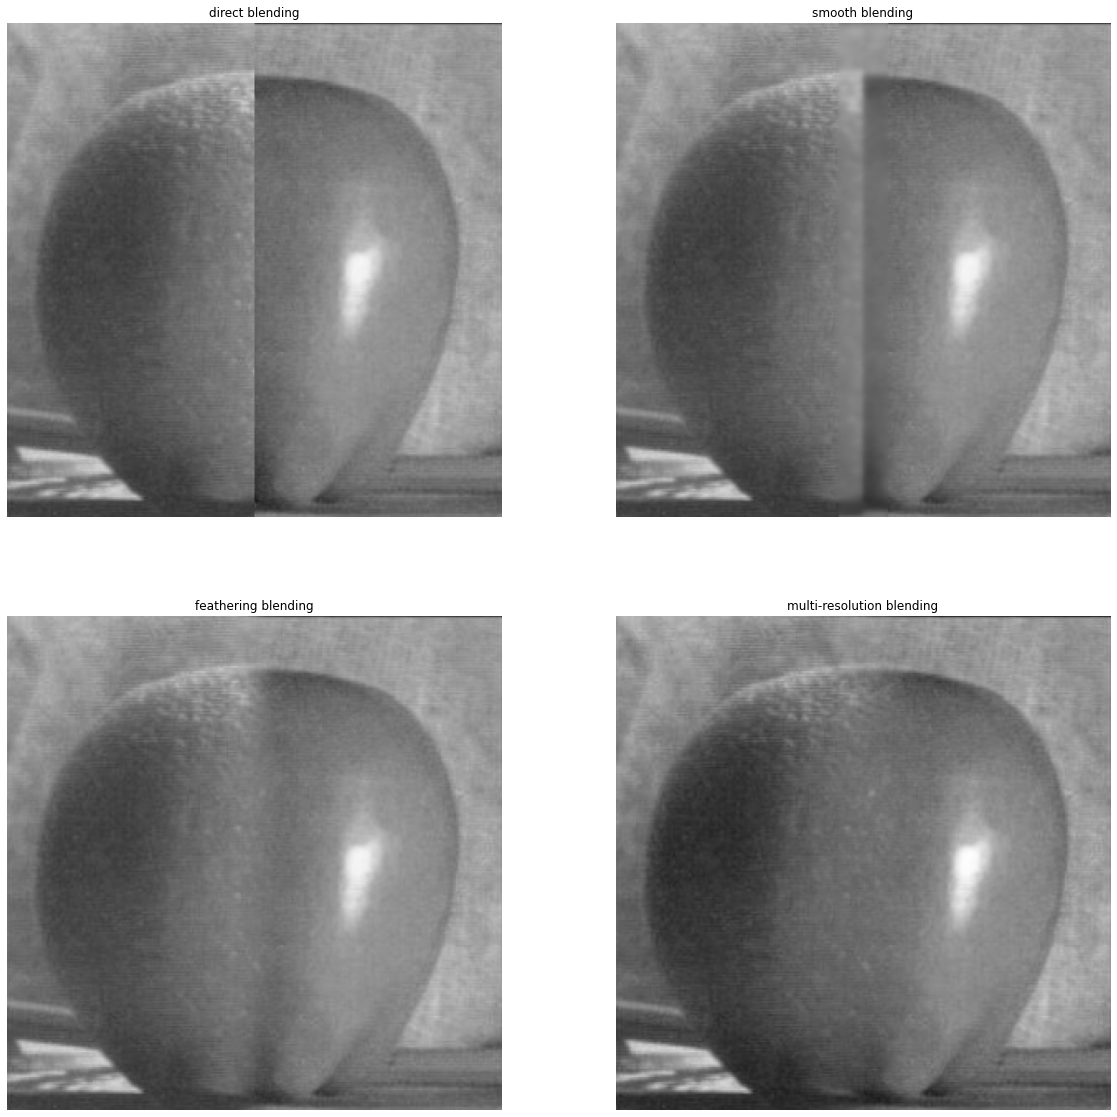

In [ ]:

im1_name = 'https://raw.githubusercontent.com/W281/fileRepository/main/orange.png'
im2_name = 'https://raw.githubusercontent.com/W281/fileRepository/main/apple.png'

im1 = plt.imread(im1_name)
im2 = plt.imread(im2_name)

direct_im = blend_direct(im1, im2)

smooth_im = blend_smooth(im1, im2, width=30)

feather_im = blend_feathering(im1, im2, width=60, show_mask=False)

plot_blend_images(direct_im, smooth_im, feather_im)
